In [1]:
import tensorflow as tf
from utils.architectures import residual_attention_92
from utils.plot import getAccuracyPlot, getLossPlot

In [2]:
cifar10 = tf.keras.datasets.cifar10 #load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #load dataset
y_train = tf.keras.utils.to_categorical(y_train, 10) #create one-hot encoding vectors for 10 classes
y_test = tf.keras.utils.to_categorical(y_test, 10) #create one-hot encoding vectors for 10 classes


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=25,
                                                          width_shift_range=0.25,
                                                          height_shift_range=0.25,
                                                          horizontal_flip=True,
                                                          validation_split=0.2) #Data Augmentation
X_train = X_train.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image
X_test = X_test.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image

datagen.fit(X_train)  #Applying Data Augmentation to the training dataset

input_shape = X_train.shape[1:]
output_size = 10

In [9]:
model = residual_attention_92(input_shape=input_shape, output_size=output_size)

In [10]:
model.compile(tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_217 (Conv2D)             (None, 16, 16, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_154 (BatchN (None, 16, 16, 64)   256         conv2d_217[0][0]                 
__________________________________________________________________________________________________
activation_160 (Activation)     (None, 16, 16, 64)   0           batch_normalization_154[0][0]    
____________________________________________________________________________________________

In [12]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(X_train, y_train, batch_size=64, subset='validation'),
                    epochs=100)

Epoch 1/100
625/625 [==============================] - 65s 86ms/step - loss: 1.9807 - accuracy: 0.2741 - val_loss: 1.9106 - val_accuracy: 0.3283
Epoch 2/100
625/625 [==============================] - 51s 82ms/step - loss: 1.6731 - accuracy: 0.3762 - val_loss: 1.9437 - val_accuracy: 0.3153
Epoch 3/100
625/625 [==============================] - 51s 82ms/step - loss: 1.5758 - accuracy: 0.4204 - val_loss: 1.5907 - val_accuracy: 0.4094
Epoch 4/100
625/625 [==============================] - 51s 81ms/step - loss: 1.5030 - accuracy: 0.4502 - val_loss: 1.5430 - val_accuracy: 0.4371
Epoch 5/100
625/625 [==============================] - 51s 81ms/step - loss: 1.4578 - accuracy: 0.4671 - val_loss: 1.4862 - val_accuracy: 0.4533
Epoch 6/100
625/625 [==============================] - 51s 81ms/step - loss: 1.4236 - accuracy: 0.4839 - val_loss: 1.5665 - val_accuracy: 0.4356
Epoch 7/100
625/625 [==============================] - 51s 81ms/step - loss: 1.3728 - accuracy: 0.4989 - val_loss: 1.6357 - val_ac

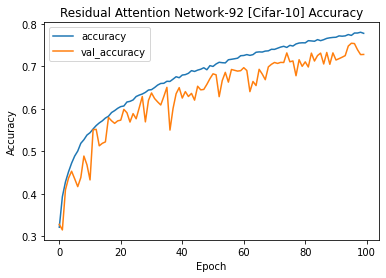

In [13]:
getAccuracyPlot(history, 'Residual Attention Network-92 [Cifar-10]')

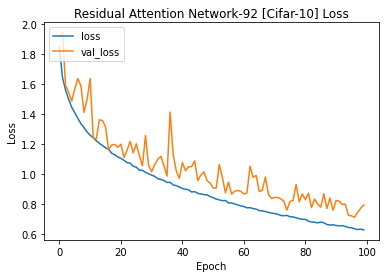

In [14]:
getLossPlot(history, 'Residual Attention Network-92 [Cifar-10]')

In [15]:
model.save('cifar10_att92_epoch100.h5')

In [4]:
from tensorflow.keras.models import load_model
model = load_model('cifar10_att92_epoch100.h5')
model.evaluate(X_test, y_test)

313/313 [==============================] - 12s 19ms/step - loss: 0.9064 - accuracy: 0.7093


[0.9064185619354248, 0.7092999815940857]